In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data_path = '/content/House_Rent_Dataset.csv'
data = pd.read_csv(data_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())


    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [4]:
# Data Cleaning and Preprocessing
# Check for missing values
print(data.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [5]:
# Assuming 'Rent' is the target variable
# Fill missing values or drop rows/columns with missing values
data = data.dropna()


In [6]:
# Feature Engineering
# Assuming 'Rent' is the target variable
X = data.drop('Rent', axis=1)
y = data['Rent']

In [7]:
# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [8]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

In [9]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [10]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [11]:
# Define the model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [14]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)


In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [16]:

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 6499186683.773536
R^2 Score: -0.6307565491332647


In [17]:
# Model Fine-tuning (Example: Hyperparameter tuning for Grid Search)
param_grid = {
    'model__fit_intercept': [True, False],
    'model__normalize': [True, False]
}


Best parameters: {'model__fit_intercept': False}
Best R^2 Score from Grid Search: -0.6896247647112121
Best Model Mean Squared Error: 6497331696.38429
Best Model R^2 Score: -0.6302911012271251


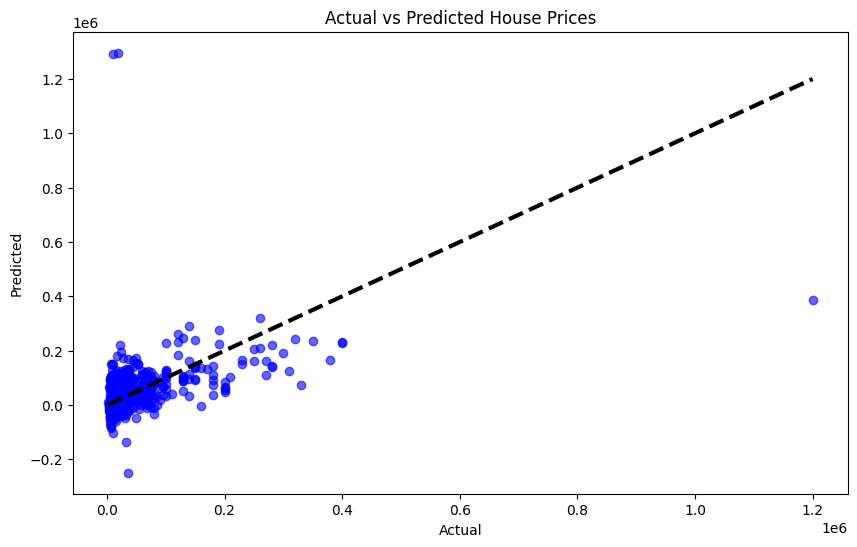

In [23]:
# Model Fine-tuning (Example: Hyperparameter tuning for Grid Search)
param_grid = {
    'model__fit_intercept': [True, False],
    # 'model__normalize': [True, False]  # Remove or comment out this line
}

# Apply Grid Search CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# ... (Rest of your code remains the same)

# Best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R^2 Score from Grid Search: {grid_search.best_score_}')

# Final evaluation on the test set with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R^2 Score: {r2_best}')

# Save predictions to a CSV file
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
predictions.to_csv('/content/House_Rent_Dataset.csv', index=False)


# Import necessary library for plotting
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

